In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [5]:
data = pd.read_csv("data/sustainability_dataset2.csv")

In [7]:
print("\n--- Dataset Overview ---")
print("Shape:", data.shape)
print("Columns:", data.columns)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())
print("\nDescriptive Statistics:\n", data.describe())



--- Dataset Overview ---
Shape: (1500, 7)
Columns: Index(['Product Name', 'Material Type', 'Carbon Footprint (kg CO₂)',
       'Energy Consumption (kWh)', 'Brand Policy (Eco-Certified)',
       'Number of Certifications', 'Sustainability Score'],
      dtype='object')

Data Types:
 Product Name                     object
Material Type                     int64
Carbon Footprint (kg CO₂)       float64
Energy Consumption (kWh)        float64
Brand Policy (Eco-Certified)      int64
Number of Certifications          int64
Sustainability Score            float64
dtype: object

Missing Values:
 Product Name                    0
Material Type                   0
Carbon Footprint (kg CO₂)       0
Energy Consumption (kWh)        0
Brand Policy (Eco-Certified)    0
Number of Certifications        0
Sustainability Score            0
dtype: int64

Descriptive Statistics:
        Material Type  Carbon Footprint (kg CO₂)  Energy Consumption (kWh)  \
count    1500.000000                1500.000000   

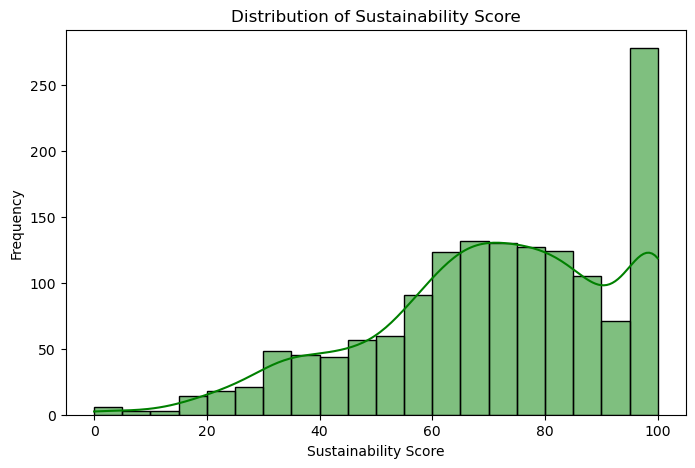

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data["Sustainability Score"], bins=20, kde=True, color="green")
plt.title("Distribution of Sustainability Score")
plt.xlabel("Sustainability Score")
plt.ylabel("Frequency")
plt.show()

In [11]:
X = data.drop(columns=["Product Name", "Sustainability Score"])
y = data["Sustainability Score"]

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
# hyper parameter
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}

In [19]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
import warnings
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5,

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
265 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.11/site-

In [20]:
print("Best Hyperparameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [21]:
# Step 6: Model Evaluation
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = best_rf.score(X_test, y_test) * 100

In [22]:
print("\n--- Model Performance ---")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Accuracy:", accuracy, "%")


--- Model Performance ---
Mean Squared Error (MSE): 42.832928455178845
R² Score: 0.9166630627596599
Accuracy: 91.666306275966 %


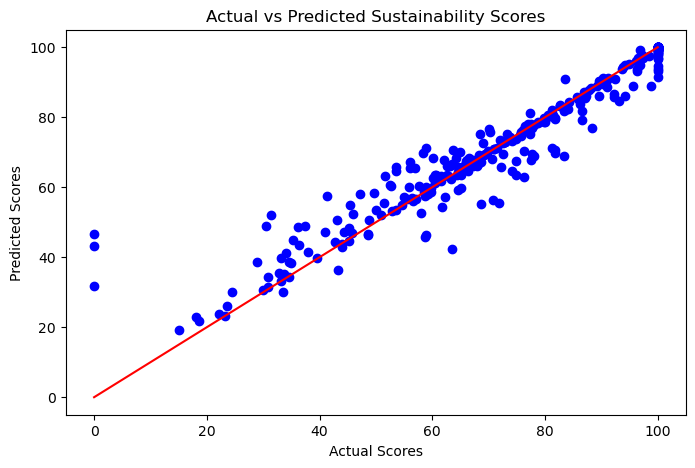

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.title("Actual vs Predicted Sustainability Scores")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.show()

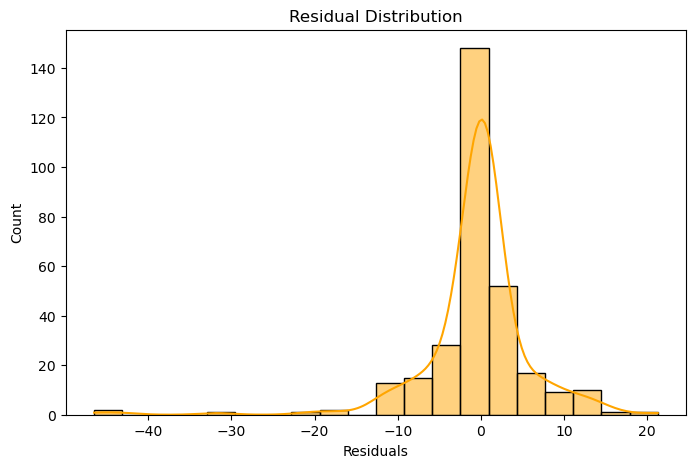

In [24]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color="orange")
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

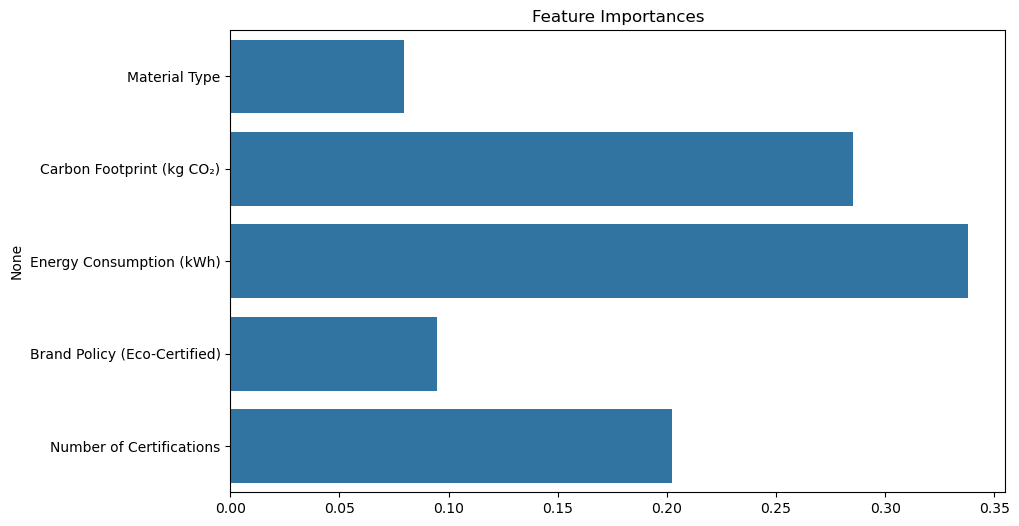

In [25]:
feature_importances = best_rf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importances")
plt.show()

In [26]:
import joblib
joblib.dump(best_rf, "sustainability_rf_model.joblib")


['sustainability_rf_model.joblib']

In [27]:
# Example hard-coded input values (replace with actual values)
input_values = np.array([[10, 20, 30, 0.5, 15]])  # Replace with actual features

# Scale the input values using the same scaler
input_values_scaled = scaler.transform(input_values)

# Predict the sustainability score
predicted_score = best_rf.predict(input_values_scaled)

print("Predicted Sustainability Score:", predicted_score[0])

Predicted Sustainability Score: 91.51675662420931
